In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
os.getcwd()
os.chdir('/Users/francescobruniprenestino/Desktop/IT coding for Data Science/Project-2')
os.getcwd()

'/Users/francescobruniprenestino/Desktop/IT coding for Data Science/Project-2'

In [18]:
data = pd.read_csv('fraudTrain.csv')

## Data Cleaning

In [19]:
# First 5 rows of the dataset
data.head()

Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   

      last gender                        street  ...      lat      long  \
0    Banks      F                561 Perry Cove  ...  36.0788  -81.1781   
1     Gill      F  43039 Riley Greens Suite 393  ...  48.8878 -118.2105   
2  Sanchez      M      594 White Dale Suite 530  ...  42.1808 -112.2620   
3    White      M   9443 Cynthia Court Apt. 038  ...  46.2306 -112.1138   
4   Garcia      M              408 Bradley Rest  ...  38.4207  -79.4629   

   city_pop                                job         dob  \
0      3495          Psychologist, counselling  1988-03-09   
1       149  Special educational needs teacher  1978-06-21   
2      4154        Nature conservation officer  1962-01-19   
3      1939                    Patent attorney  1967-01-12   
4        99     Dance movement psychotherapist  1986-03-28   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   

   is_fraud  
0         0  
1         0  
2         0  
3         0  
4         0  

[5 rows x 23 columns]

We have only 8 variables that are numeric, the others are all categorical.

In particular we have:
- trans_date_trans_time: it is the date of the Transaction
- cc_num: Number of the Credit Card
- merchant: It is the name of the merchant
- category: It is the Spending category (type of Spending)
- amt: amount of the Transaction     
- first: First Name                     
- last: Last Name                      
- gender                    
- street: Street of the credit card holder               
- city: city of the credit card holder                  
- state: state of the credit card holder                  
- zip: zip code of the credit card holder                      
- lat: latitude of the credit card holder                    
- long: longitude of the credit card holder               
- city_pop: population of the city               
- job: type of job of the credit card holder                  
- dob: day of born of the credit card holder                   
- trans_num: number of the Transaction          
- unix_time          
- merch_lat                
- merch_long               
- is_fraud: Target Variable (0=no Fraud, 1=Fraud)

In [20]:
data.dtypes

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

We have 23 features and 1296675 observations

In [21]:
data.shape

(1296675, 23)

**We check the presence of missing values:**
No Missing Value

In [22]:
data.isna().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

**We have no duplicated observation**

In [23]:
data.duplicated().sum()

0

**Convert Date of Born (Dob) into age**

In [24]:
from datetime import datetime, date

In [25]:
data['dob']= date.today().year - pd.to_datetime(data['dob']).dt.year

**The next step is to drop the columns that have unique information and so are not relevant for our analysis**

In [26]:
data1 = data.drop(columns=['Unnamed: 0', 'cc_num', 'first', 'last', 'unix_time', 'trans_num'])

In [27]:
data1

trans_date_trans_time                             merchant  \
0         2019-01-01 00:00:18           fraud_Rippin, Kub and Mann   
1         2019-01-01 00:00:44      fraud_Heller, Gutmann and Zieme   
2         2019-01-01 00:00:51                 fraud_Lind-Buckridge   
3         2019-01-01 00:01:16   fraud_Kutch, Hermiston and Farrell   
4         2019-01-01 00:03:06                  fraud_Keeling-Crist   
...                       ...                                  ...   
1296670   2020-06-21 12:12:08                    fraud_Reichel Inc   
1296671   2020-06-21 12:12:19             fraud_Abernathy and Sons   
1296672   2020-06-21 12:12:32                 fraud_Stiedemann Ltd   
1296673   2020-06-21 12:13:36  fraud_Reinger, Weissnat and Strosin   
1296674   2020-06-21 12:13:37  fraud_Langosh, Wintheiser and Hyatt   

              category     amt gender                         street  \
0             misc_net    4.97      F                 561 Perry Cove   
1          grocery_pos  107.23      F   43039 Riley Greens Suite 393   
2        entertainment  220.11      M       594 White Dale Suite 530   
3        gas_transport   45.00      M    9443 Cynthia Court Apt. 038   
4             misc_pos   41.96      M               408 Bradley Rest   
...                ...     ...    ...                            ...   
1296670  entertainment   15.56      M       162 Jessica Row Apt. 072   
1296671    food_dining   51.70      M  8617 Holmes Terrace Suite 651   
1296672    food_dining  105.93      M     1632 Cohen Drive Suite 639   
1296673    food_dining   74.90      M           42933 Ryan Underpass   
1296674    food_dining    4.30      M           135 Joseph Mountains   

                             city state    zip      lat      long  city_pop  \
0                  Moravian Falls    NC  28654  36.0788  -81.1781      3495   
1                          Orient    WA  99160  48.8878 -118.2105       149   
2                      Malad City    ID  83252  42.1808 -112.2620      4154   
3                         Boulder    MT  59632  46.2306 -112.1138      1939   
4                        Doe Hill    VA  24433  38.4207  -79.4629        99   
...                           ...   ...    ...      ...       ...       ...   
1296670                     Hatch    UT  84735  37.7175 -112.4777       258   
1296671                 Tuscarora    MD  21790  39.2667  -77.5101       100   
1296672  High Rolls Mountain Park    NM  88325  32.9396 -105.8189       899   
1296673                 Manderson    SD  57756  43.3526 -102.5411      1126   
1296674                      Sula    MT  59871  45.8433 -113.8748       218   

                                       job  dob  merch_lat  merch_long  \
0                Psychologist, counselling   35  36.011293  -82.048315   
1        Special educational needs teacher   45  49.159047 -118.186462   
2              Nature conservation officer   61  43.150704 -112.154481   
3                          Patent attorney   56  47.034331 -112.561071   
4           Dance movement psychotherapist   37  38.674999  -78.632459   
...                                    ...  ...        ...         ...   
1296670                       Geoscientist   62  36.841266 -111.690765   
1296671   Production assistant, television   44  38.906881  -78.246528   
1296672                    Naval architect   56  33.619513 -105.130529   
1296673              Volunteer coordinator   43  42.788940 -103.241160   
1296674           Therapist, horticultural   28  46.565983 -114.186110   

         is_fraud  
0               0  
1               0  
2               0  
3               0  
4               0  
...           ...  
1296670         0  
1296671         0  
1296672         0  
1296673         0  
1296674         0  

[1296675 rows x 17 columns]

## Exploratory Data Analysis

We now want to observe the behaviour of the explanatory variables with respect to the response variable, and whether there is a correlation between them.

**Fraudalent transaction among the time**

- **With respect the age**

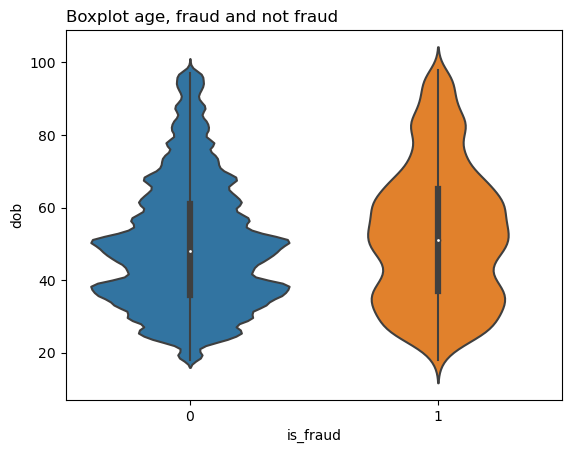

In [29]:
# boxplot
ax1 = sns.violinplot(x='is_fraud', y='dob', data=data1)
plt.title("Boxplot age, fraud and not fraud", loc="left")
plt.show()

We provide 2 boxplots, for is_fraud = 0 (no fraudulant transaction) and is_fraud = 1 (fraudulant transaction).
The 2 boxplots show the distribution of the 2 target variables with respect the variable age. What it is possible to observe is a similar distribution for both Fraud and No Fraud transaction, with 2 peaks around age equal to 40 and 50.
Also the medians and the interquintile ranges are almost the same, but the Fraud transaction seems to be more distributed among the whole range, instead the No Fraud transaction are more contentreted around the 2 peaks.

- **With Respect the date of the transaction**

Now, could be interesting understand if it is present a correlation between the fraudulant transaction and the date of the transaction, so if there is a cyclical component in the fradulant transaction (in particular with reaspect the single day, within a week and a year and also among many years).

In [30]:
time = pd.DataFrame()
time['hour'] = pd.to_datetime(data1['trans_date_trans_time']).dt.hour
time['day'] = pd.to_datetime(data1['trans_date_trans_time']).dt.dayofweek
time['month'] = pd.to_datetime(data1['trans_date_trans_time']).dt.month
time['year'] = pd.to_datetime(data1['trans_date_trans_time']).dt.year
time['is_fraud'] = data1.is_fraud
time

hour  day  month  year  is_fraud
0           0    1      1  2019         0
1           0    1      1  2019         0
2           0    1      1  2019         0
3           0    1      1  2019         0
4           0    1      1  2019         0
...       ...  ...    ...   ...       ...
1296670    12    6      6  2020         0
1296671    12    6      6  2020         0
1296672    12    6      6  2020         0
1296673    12    6      6  2020         0
1296674    12    6      6  2020         0

[1296675 rows x 5 columns]

    - Percentage of Fraud and No Fraud transaction within a day

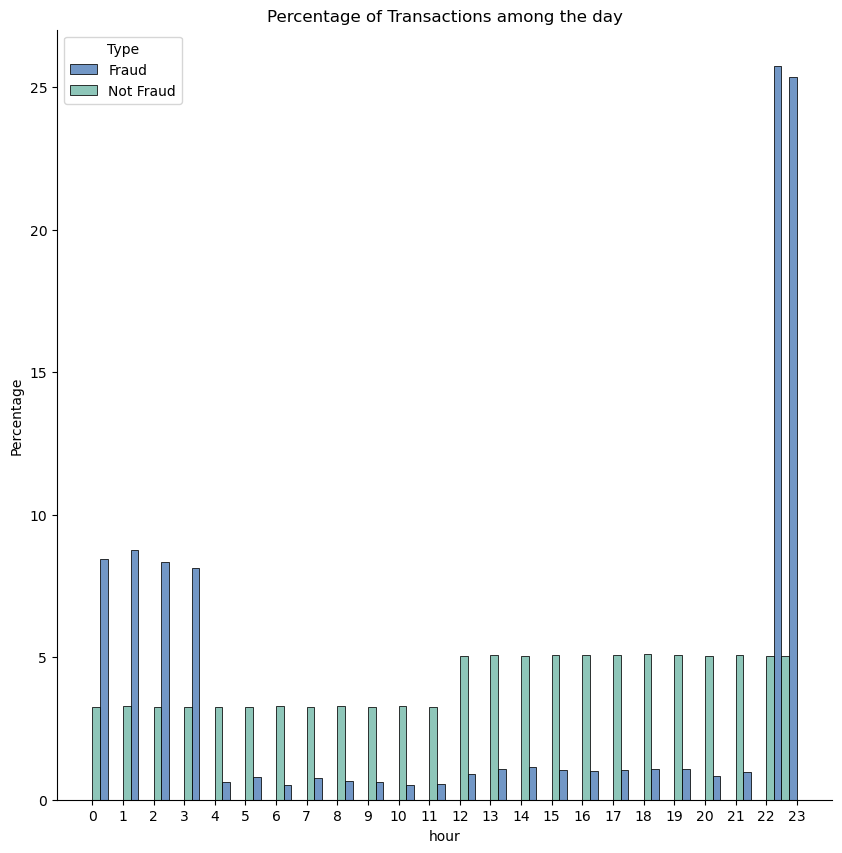

In [175]:
colors = ["#69b3a2", "#4374B3"]
sns.set_palette(sns.color_palette(colors))

plt.figure(figsize=(10, 10))

ax = sns.histplot(
    x='hour', hue='is_fraud', data=time, common_norm=False, stat='percent', multiple='dodge', binwidth = 0.5)

ax.set_title("Percentage of Transactions among the day")
ax.set_ylabel("Percentage")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.xticks(np.arange(0,24,1))
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

Over the course of a day, it can be seen that non-fraudulent transactions are almost constantly distributed between all hours, whereas fraudulent transactions are particularly concentrated between 10.00 p.m. and 3.00 a.m.
This explains how most fraudulent transactions take place during hours when people are asleep and are therefore unable to counter fraud. 

    - Percentage of Fraud and No Fraud transaction within a week

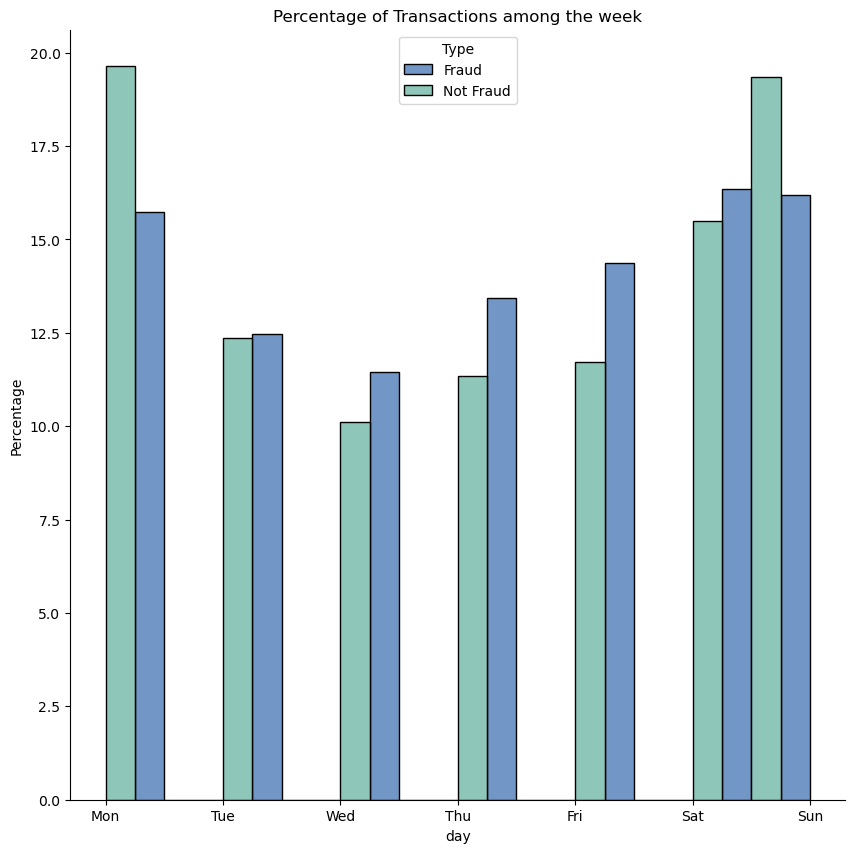

In [176]:
colors = ["#69b3a2", "#4374B3"]
sns.set_palette(sns.color_palette(colors))

plt.figure(figsize=(10, 10))

ax = sns.histplot(
    x='day', hue='is_fraud', data=time, common_norm=False, stat='percent', multiple='dodge', binwidth = 0.5, bins = 7)

ax.set_title("Percentage of Transactions among the week")
ax.set_ylabel("Percentage")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.xticks(np.arange(0, 7, 1))
ax.set_xticklabels(["Mon","Tue","Wed","Thu","Fri","Sat","Sun"])

plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

Within a week, the distribution of fraudulent and non-fraudulent transactions turns out to be quite similar, with an increase at the weekend and a decrease reaching a minimum in the middle of the week. Thus, the different days of the week are not particularly relevant for identifying fraudulent transactions.

    - Percentage of Fraud and No Fraud transaction within a year

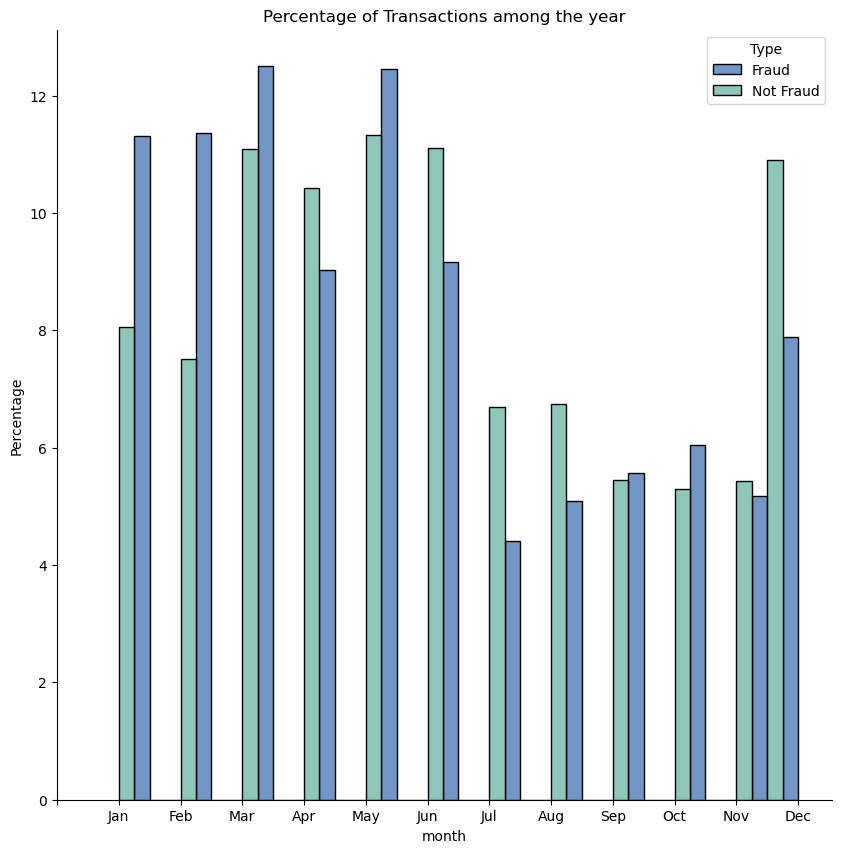

In [177]:
colors = ["#69b3a2", "#4374B3"]
sns.set_palette(sns.color_palette(colors))

plt.figure(figsize=(10, 10))

ax = sns.histplot(
    x='month', hue='is_fraud', data=time, common_norm=False, stat='percent', multiple='dodge', binwidth = 0.5, bins = 7)

ax.set_title("Percentage of Transactions among the year")
ax.set_ylabel("Percentage")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.xticks(np.arange(0, 13, 1))
ax.set_xticklabels([" ","Jan","Feb","Mar","Apr","May","Jun","Jul",'Aug','Sep','Oct','Nov','Dec'])

plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

In terms of months, there is a higher concentration of fraudulent transactions in the first five months of the year, between January and May, and a decrease in the second half of the year. With regard to fraud-free transactions, the highest percentage of transactions is between March and June, and after a decrease in the following months, there is an increase in December.

    - Percentage of Fraud and No Fraud transactions among several years

In [34]:
time2 = time.groupby(['year','is_fraud'])['is_fraud'].count().reset_index(name = 'count')
time2_0 = time2.iloc[[0,1],:]
time2_0['percentage'] = time2_0['count'] / sum(time2_0['count'])
time2_1 = time2.iloc[[2,3],:]
time2_1['percentage'] = time2_1['count'] / sum(time2_1['count'])



In [35]:
time2_0

year  is_fraud   count  percentage
0  2019         0  919630    0.994356
1  2019         1    5220    0.005644

In [36]:
time2_1

year  is_fraud   count  percentage
2  2020         0  369539    0.993852
3  2020         1    2286    0.006148

As we only have data defined over 2 years in our dataset, we have no particular evidence. More generally, we have an almost unchanged portion of fraudulent and non-fraudulent transactions, with an overall decrease in transactions between 2019 and 2020, which could be related to the pandemic outbreak in March 2020.

**Distribution with respect the Gender**

In [37]:
table = data1.groupby(['is_fraud', 'gender'])['dob'].count().reset_index(name = 'count')
table

is_fraud gender   count
0         0      F  706128
1         0      M  583041
2         1      F    3735
3         1      M    3771

In [38]:
table_0 = table.iloc[[0,1],:]
table_1 = table.iloc[[2,3],:]

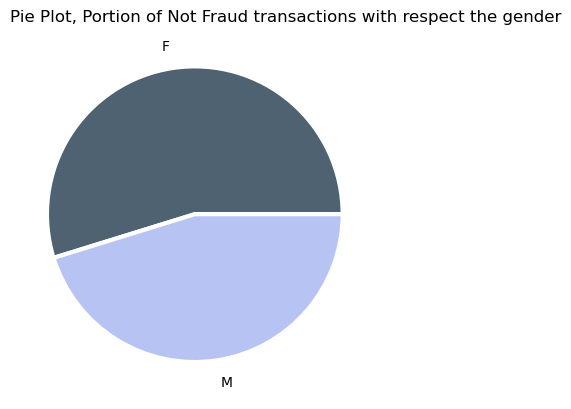

In [41]:
plt.pie(table_0['count'], labels=table_0.gender, labeldistance=1.15, wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' }, colors=['#4F6272', '#B7C3F3'])
plt.title("Pie Plot, Portion of Not Fraud transactions with respect the gender", loc="left")
plt.show()

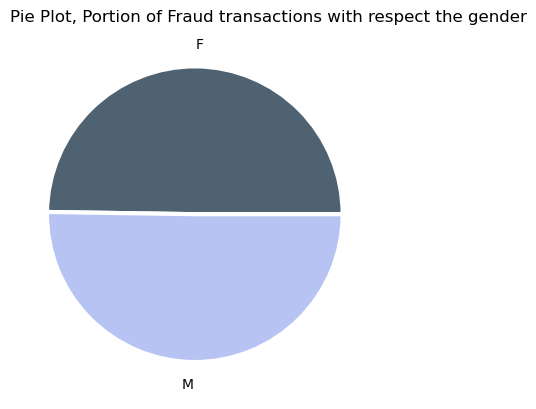

In [42]:
plt.pie(table_1['count'], labels=table_1.gender, labeldistance=1.15, wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' }, colors=['#4F6272', '#B7C3F3'])
plt.title("Pie Plot, Portion of Fraud transactions with respect the gender", loc="left")
plt.show()

Looking at the difference between the sexes, we can see that in Transactions without fraud the percentage of females is slightly higher than that of males, while in Transactions with fraud the percentage is almost the same.
In the end, we can conclude that the percentage of transactions between males and females is quite similar for both transactions with and without fraud, and therefore no relevant differences are present.

**Distribution with respect Spending Category**

Text(0.5, 1.0, 'The Percentage Difference of Fraudulent over Non-Fraudulent Transations in Each Spending Category')

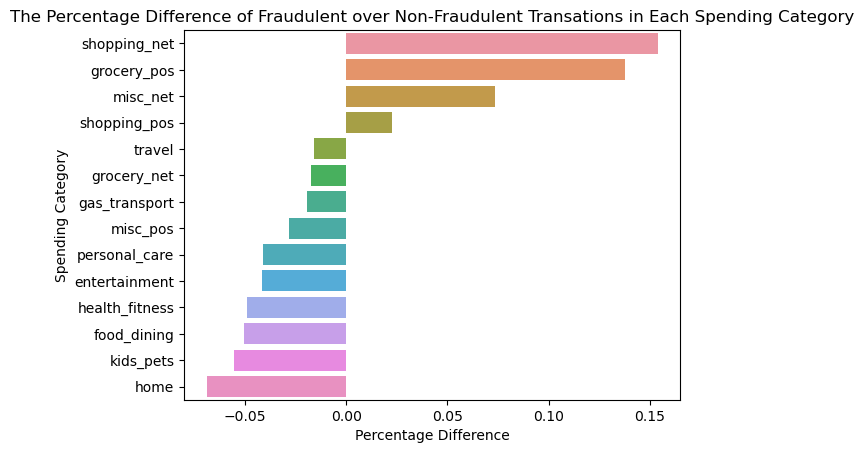

In [43]:
#calculate the percentage for is_fraud = 0
fraud_0=data1[data1['is_fraud']==0]['category'].value_counts(normalize=True).to_frame().reset_index()
fraud_0.columns=['category','not fraud percentage']

#calculate the percentage for is_fraud = 0
fraud_1=data1[data1['is_fraud']==1]['category'].value_counts(normalize=True).to_frame().reset_index()
fraud_1.columns=['category','fraud percentage']

#make the percentage difference
Diff=fraud_0.merge(fraud_1,on='category')
Diff['diff']=Diff['fraud percentage']-Diff['not fraud percentage']

ax=sns.barplot(y='category',x='diff',data=Diff.sort_values('diff',ascending=False))
ax.set_xlabel('Percentage Difference')
ax.set_ylabel('Spending Category')
plt.title('The Percentage Difference of Fraudulent over Non-Fraudulent Transations in Each Spending Category')

Looking at the spending category, we can see some relevant differences in the percentage difference between fraudulent and non-fraudulent transactions.

In particular, the higher the percentage difference between fraudulent and non-fraudulent transactions, the more relevant that particular category is in identifying whether a transaction is fraudulent or not.

So, which are the most relevant categories?
- Shopping Net
- Grocery Pos
- Misc Net
- Home

**Fraudalent Transactions among the geografic area**

Let's look at the distribution of fraudulent transactions with respect to different states

In [44]:
#calculate the percentage difference
a=data1[data1['is_fraud']==0]['state'].value_counts(normalize=True).to_frame().reset_index()
a.columns=['state','not fraud percentage']

b=data1[data1['is_fraud']==1]['state'].value_counts(normalize=True).to_frame().reset_index()
b.columns=['state','fraud percentage']
ab=a.merge(b,on='state')
ab['diff']=ab['fraud percentage']-ab['not fraud percentage']

In [45]:
ab['text'] = 'The state: ' + ab['state'].astype(str) + ' has a percentage difference between Fraud and Not Fraud transation equal to: ' + ab['diff'].astype(str)

In [46]:
ab

state  not fraud percentage  fraud percentage      diff  \
0     TX              0.073223          0.063816 -0.009408   
1     NY              0.064341          0.073941  0.009600   
2     PA              0.061582          0.061018 -0.000564   
3     CA              0.043465          0.043432 -0.000033   
4     OH              0.035805          0.042766  0.006961   
5     MI              0.035617          0.031708 -0.003909   
6     IL              0.033358          0.033040 -0.000318   
7     FL              0.032882          0.037437  0.004555   
8     AL              0.031628          0.028644 -0.002984   
9     MO              0.029641          0.025446 -0.004194   
10    MN              0.024440          0.027578  0.003138   
11    AR              0.024020          0.021450 -0.002571   
12    NC              0.023362          0.019851 -0.003511   
13    WI              0.022654          0.021716 -0.000938   
14    VA              0.022535          0.026379  0.003843   
15    SC              0.022493          0.025713  0.003220   
16    KY              0.021968          0.020650 -0.001317   
17    IN              0.021283          0.018918 -0.002365   
18    IA              0.020822          0.018918 -0.001904   
19    OK              0.020578          0.019051 -0.001526   
20    MD              0.020196          0.020917  0.000721   
21    GA              0.020104          0.019451 -0.000653   
22    WV              0.019815          0.019451 -0.000364   
23    NJ              0.018993          0.015721 -0.003272   
24    NE              0.018607          0.023981  0.005373   
25    KS              0.017717          0.020783  0.003067   
26    MS              0.016346          0.015321 -0.001025   
27    LA              0.016192          0.012124 -0.004068   
28    WY              0.014903          0.014655 -0.000248   
29    WA              0.014605          0.012790 -0.001815   
30    OR              0.014310          0.019851  0.005541   
31    TN              0.013508          0.018652  0.005144   
32    ME              0.012711          0.015854  0.003143   
33    NM              0.012663          0.010925 -0.001739   
34    ND              0.011425          0.007594 -0.003831   
35    CO              0.010679          0.015055  0.004376   
36    MA              0.009546          0.009193 -0.000354   
37    SD              0.009502          0.009859  0.000357   
38    MT              0.009093          0.004263 -0.004829   
39    VT              0.009073          0.009592  0.000520   
40    AZ              0.008326          0.004929 -0.003396   
41    UT              0.008252          0.008127 -0.000125   
42    NH              0.006375          0.007860  0.001485   
43    CT              0.005962          0.002132 -0.003830   
44    NV              0.004313          0.006262  0.001949   
45    ID              0.004293          0.001465 -0.002827   
46    DC              0.002786          0.002798  0.000011   
47    HI              0.001980          0.000933 -0.001047   
48    AK              0.001617          0.004796  0.003180   
49    RI              0.000415          0.001998  0.001583   

                                                 text  
0   The state: TX has a percentage difference betw...  
1   The state: NY has a percentage difference betw...  
2   The state: PA has a percentage difference betw...  
3   The state: CA has a percentage difference betw...  
4   The state: OH has a percentage difference betw...  
5   The state: MI has a percentage difference betw...  
6   The state: IL has a percentage difference betw...  
7   The state: FL has a percentage difference betw...  
8   The state: AL has a percentage difference betw...  
9   The state: MO has a percentage difference betw...  
10  The state: MN has a percentage difference betw...  
11  The state: AR has a percentage difference betw...  
12  The state: NC has a percentage difference betw...  
13  The state: WI has a percentage difference betw...  


In [47]:
pip install chart_studio

Note: you may need to restart the kernel to use updated packages.


In [48]:
import chart_studio.plotly as py
import chart_studio.tools as tls
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode()

In [49]:
tls.set_credentials_file(username='bigdatagal', api_key='hvginfgvwe')

In [50]:
graph = [dict(type= 'choropleth', autocolorscale=False, locations=ab['state'], z=ab['diff'], locationmode='USA-states', 
             text= ab['text'], colorscale = 'twilight', colorbar = dict(title='percentage difference'))]

In [51]:
layout = dict(title = "Percentage Difference between Fraud and Not Fraud Transation among Countries",
              geo = dict(scope= 'usa', projection=dict(type = 'albers usa'), showlakes = True, lakecolor='rgb(66, 165, 245)'))


In [52]:
fig = dict(data = graph, layout=layout)
iplot(fig, filename='d3-choropleth-map')

As noted above for spending categories, the greater the percentage difference between fraudulent and non-fraudulent transactions, the more relevant that country is in identifying fraudulent transactions.

In this case, we can see that Texas and New York are the most relevant countries, with a percentage difference equal to -0.94% and 0.96%.

**Fraudalent Transaction with respect the kind of Job**

In [53]:
#calculate the percentage difference
a=data1[data1['is_fraud']==0]['job'].value_counts(normalize=True).to_frame().reset_index()
a.columns=['job','not fraud percentage']

b=data1[data1['is_fraud']==1]['job'].value_counts(normalize=True).to_frame().reset_index()
b.columns=['job','fraud percentage']
ab=a.merge(b,on='job')
ab['diff']=ab['fraud percentage']-ab['not fraud percentage']

ab.sort_values(by=['diff'], inplace = True)

ab

job  not fraud percentage  \
4               Designer, ceramics/pottery              0.006371   
6                        Systems developer              0.005963   
55                 Chartered loss adjuster              0.003981   
15                                     Sub              0.005187   
37                              Counsellor              0.004349   
..                                     ...                   ...   
137                  Private music teacher              0.002730   
104  Senior tax professional/tax inspector              0.003150   
393                                 Lawyer              0.000397   
196                      Nurse, children's              0.001977   
73               Trading standards officer              0.003557   

     fraud percentage      diff  
4            0.001599 -0.004772  
6            0.001732 -0.004231  
55           0.000400 -0.003581  
15           0.001865 -0.003322  
37           0.001199 -0.003149  
..                ...       ...  
137          0.005462  0.002732  
104          0.005995  0.002845  
393          0.003730  0.003333  
196          0.005329  0.003352  
73           0.007461  0.003904  

[424 rows x 4 columns]

In this case, a graphical representation is difficult to implement because there are too many job types, so let us look at the jobs that show the greatest percentage difference between fraudulent and non-fraudulent transactions.
The jobs with the largest percentage difference are Designer and Systems Developer with an absolute percentage difference of 0.47% and 0.42%. What can be deduced is that the job is not a relevant characteristic for identifying fraudulent transactions, since the percentage differences are very close to zero.

**Fraudalent Transactions with respect the amount of the transaction**

In [55]:
data1['amt'].describe()

count    1.296675e+06
mean     7.035104e+01
std      1.603160e+02
min      1.000000e+00
25%      9.650000e+00
50%      4.752000e+01
75%      8.314000e+01
max      2.894890e+04
Name: amt, dtype: float64

In [56]:
data1.groupby('is_fraud')['amt'].describe()

count        mean         std   min       25%      50%      75%  \
is_fraud                                                                        
0         1289169.0   67.667110  154.007971  1.00    9.6100   47.280   82.540   
1            7506.0  531.320092  390.560070  1.06  245.6625  396.505  900.875   

               max  
is_fraud            
0         28948.90  
1          1376.04

What we can said from this first table is that fraudulent transactions are not present above and below a certain amount, they lie between 1.06 and 1376.04.
By contrast, the range of non-fraudulent transactions is much wider.

What can we say about their distributions?

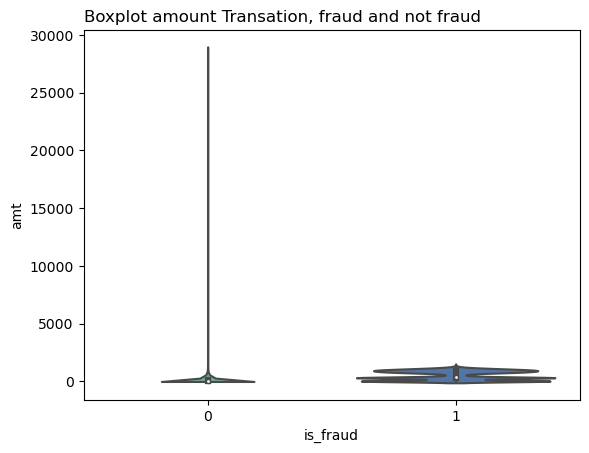

In [57]:
#boxplot
ax2 = sns.violinplot(x='is_fraud', y='amt', data=data1)
plt.title("Boxplot amount Transation, fraud and not fraud", loc="left")
plt.show()

We can see a strong amount of outliers observations for the 'no fraudulant transactions'.

We decide to apply a window in the range from 0 to 1700 of the variable 'amount'.

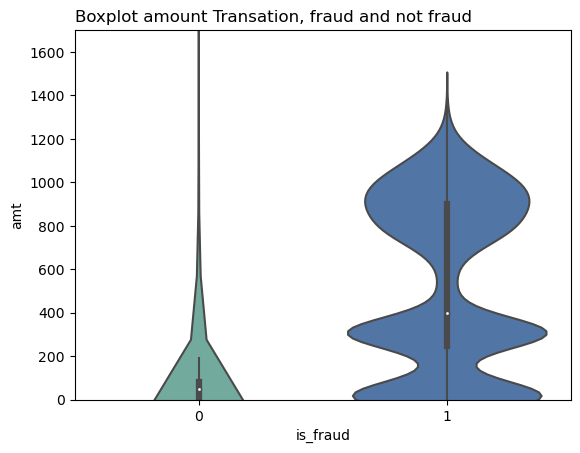

In [58]:
#boxplot
ax2 = sns.violinplot(x='is_fraud', y='amt', data=data1)
plt.title("Boxplot amount Transation, fraud and not fraud", loc="left")
plt.ylim(0, 1700)
plt.show()


We can observe that non-fraudulent Transactions are strongly distributed in the range 0 - 200, thus in a rather low amount level, and thereafter there is an exponential decrease in the number of transactions as the amount increases.

For Fraudulent Transactions, on the other hand, there are several peaks in the number of transactions in the whole range of values and so it is more distributed also around higher levels of the amount.

### Columns Selection

Before proceeding with the analysis, we select a subset of all attributes, choosing those that are most relevant for detecting fraudulent transactions.

In [59]:
# first we adding the variable hour, day, month and year to the dataset for substitute the varaible 'trans_date_trans_time'
data1['hour']=pd.to_datetime(data1['trans_date_trans_time']).dt.hour
data1['day']=pd.to_datetime(data1['trans_date_trans_time']).dt.dayofweek
data1['month']=pd.to_datetime(data1['trans_date_trans_time']).dt.month
data1['year']=pd.to_datetime(data1['trans_date_trans_time']).dt.year

# second we select a subset of the attributes
train = data1[['category','amt','zip','lat','long','city_pop','merch_lat','merch_long','dob','hour','day','month','is_fraud']]

Since many algorithms do not work very well in the presence of categorical variables, we provide a transformation of these into dummies:

In [61]:
train=pd.get_dummies(train, drop_first=True)

train

amt    zip      lat      long  city_pop  merch_lat  merch_long  \
0          4.97  28654  36.0788  -81.1781      3495  36.011293  -82.048315   
1        107.23  99160  48.8878 -118.2105       149  49.159047 -118.186462   
2        220.11  83252  42.1808 -112.2620      4154  43.150704 -112.154481   
3         45.00  59632  46.2306 -112.1138      1939  47.034331 -112.561071   
4         41.96  24433  38.4207  -79.4629        99  38.674999  -78.632459   
...         ...    ...      ...       ...       ...        ...         ...   
1296670   15.56  84735  37.7175 -112.4777       258  36.841266 -111.690765   
1296671   51.70  21790  39.2667  -77.5101       100  38.906881  -78.246528   
1296672  105.93  88325  32.9396 -105.8189       899  33.619513 -105.130529   
1296673   74.90  57756  43.3526 -102.5411      1126  42.788940 -103.241160   
1296674    4.30  59871  45.8433 -113.8748       218  46.565983 -114.186110   

         dob  hour  day  ...  category_grocery_pos  category_health_fitness  \
0         35     0    1  ...                     0                        0   
1         45     0    1  ...                     1                        0   
2         61     0    1  ...                     0                        0   
3         56     0    1  ...                     0                        0   
4         37     0    1  ...                     0                        0   
...      ...   ...  ...  ...                   ...                      ...   
1296670   62    12    6  ...                     0                        0   
1296671   44    12    6  ...                     0                        0   
1296672   56    12    6  ...                     0                        0   
1296673   43    12    6  ...                     0                        0   
1296674   28    12    6  ...                     0                        0   

         category_home  category_kids_pets  category_misc_net  \
0                    0                   0                  1   
1                    0                   0                  0   
2                    0                   0                  0   
3                    0                   0                  0   
4                    0                   0                  0   
...                ...                 ...                ...   
1296670              0                   0                  0   
1296671              0                   0                  0   
1296672              0                   0                  0   
1296673              0                   0                  0   
1296674              0                   0                  0   

         category_misc_pos  category_personal_care  category_shopping_net  \
0                        0                       0                      0   
1                        0                       0                      0   
2                        0                       0                      0   
3                        0                       0                      0   
4                        1                       0                      0   
...                    ...                     ...                    ...   
1296670                  0                       0                      0   
1296671                  0                       0                      0   
1296672                  0                       0                      0   
1296673                  0                       0                      0   
1296674                  0                       0                      0   

         category_shopping_pos  category_travel  
0                            0                0  
1                            0                0  
2                            0                0  
3                            0                0  
4                            0                0  
...                        ...              ...  
1296670                      0                0  
1296671             

Before providing the balance of the training set, we extract the validation set from it.
As the training set is too heavy, after producing a strong subsample of the majority class, and bringing the whole size of the training set around 200,000 observations, we follow this choice also in the validation set and select only 20000 observations (10% of the balanced training set):

In [62]:
SEED = 42

In [63]:
validation_set = train.sample(20000, random_state = SEED)

## Is the Dataset Imbalanced?
We now check if the dataset is balance or not with respect the target variable (that is binary)

In [64]:
train.is_fraud.value_counts()

0    1289169
1       7506
Name: is_fraud, dtype: int64

We can see a strong imbalanced dataset, with 99.4% of the observation that is not Fraud and only the 0.06% that is Fraud.

In [65]:
train.is_fraud.value_counts(normalize = True)

0    0.994211
1    0.005789
Name: is_fraud, dtype: float64

<Axes: ylabel='is_fraud'>

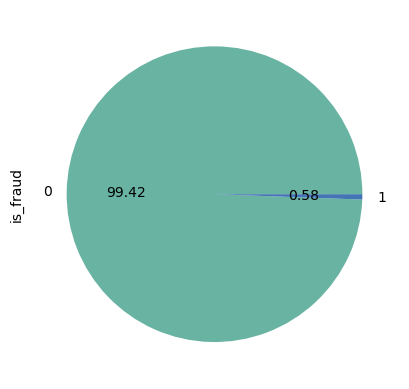

In [66]:
train.is_fraud.value_counts().plot.pie(autopct='%.2f')

##### Handling the imbalancing

We want to counteract the unbalancing of the dataset, this is because with high probability by keeping the dataset in this way we will get a model that predicts well the variable "is.fraud" when it is = 0, but not if the variable is equal to 1, that is our goal.
So, the first thing to do is to reduce the majority class and then apply an **undersample Technique** for two reasons:
- Reduce the overfitting produced by using the **over-sampling technique**. 
- Reduce the number of rows in the entire dataset, because we have about 1.2 million rows for the majority class alone. This large number of rows substantially increases the complexity of the dataset but also of the algorithms that we want to use for analysis. 

The reduction of the majority class is done using a **random under-sampling technique**, in which a subset of the observations of the majority class is chosen at random. In order to reduce the loss of too much information of the majority class, it is decided to maintain a higher subset dimensionality than the size of the minority class. 

The second step is based on the application of an **over-sampling technique**.
The duplication of the minority class is done using the **SMOTE technique**. A synthetic sample is used, not simply duplicating the minority sample n times until the majority sample is reached. The synthetic sample is made using the K-NN algorithm.

In [67]:
df_class_0 = train[train["is_fraud"] == 0]

df_class_1 = train[train["is_fraud"] == 1]

In [68]:
df_class_0.shape, df_class_1.shape

((1289169, 25), (7506, 25))

In [69]:
# define the undersampling method
df_class_0_und = df_class_0.sample(100000, random_state = SEED)

In [70]:
# transform the dataset
train_under = pd.concat([df_class_0_und, df_class_1], axis = 0)

train_under.shape

(107506, 25)

In [71]:
X_und = train_under.drop("is_fraud", axis='columns')
y_und = train_under['is_fraud']

**2° step** Oversampling SMOTE

In [72]:
from imblearn.over_sampling import SMOTE

In [73]:
smote = SMOTE(sampling_strategy = 'minority')

In [74]:
X, y = smote.fit_resample(X_und, y_und)

train_balance = pd.concat([X, y], axis = 1)

The Dataset is Balanced:

In [76]:
y.value_counts()

0    100000
1    100000
Name: is_fraud, dtype: int64

## Clustering

We want to find similarities between the population in the dataset with the intention of creating some groups of similar observations.

In [77]:
from sklearn.cluster import KMeans, DBSCAN

# for visualize the dataset we use the PCA to reduce the dimension in 2 and 3 dimension
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

### Reduce Dataset Dimension
**Normalize the data**

In [78]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(X)

x_train_scaled

array([[-0.58120679,  1.55106691, -0.89989281, ..., -0.33441561,
        -0.25491124, -0.12940558],
       [-0.58224567,  0.57223357, -0.37424318, ..., -0.33441561,
        -0.25491124, -0.12940558],
       [-0.54536541, -1.21376103,  0.26126325, ..., -0.33441561,
        -0.25491124, -0.12940558],
       ...,
       [ 2.11123964,  0.37680626,  1.4782379 , ..., -0.33441561,
        -0.25491124, -0.12940558],
       [ 1.65520295, -1.24061476,  0.72069745, ..., -0.33441561,
        -0.25491124, -0.12940558],
       [ 1.18907453, -0.52519146, -2.42357311, ..., -0.33441561,
        -0.25491124, -0.12940558]])

**PCA**

In [79]:
pca = PCA(n_components = 3) # we want reduce in 3
x_train_pca = pca.fit_transform(x_train_scaled)

**Plotting the data in a 2D and 3D system**

Text(0.5, 1.0, 'Data Points in 2 Dimensions')

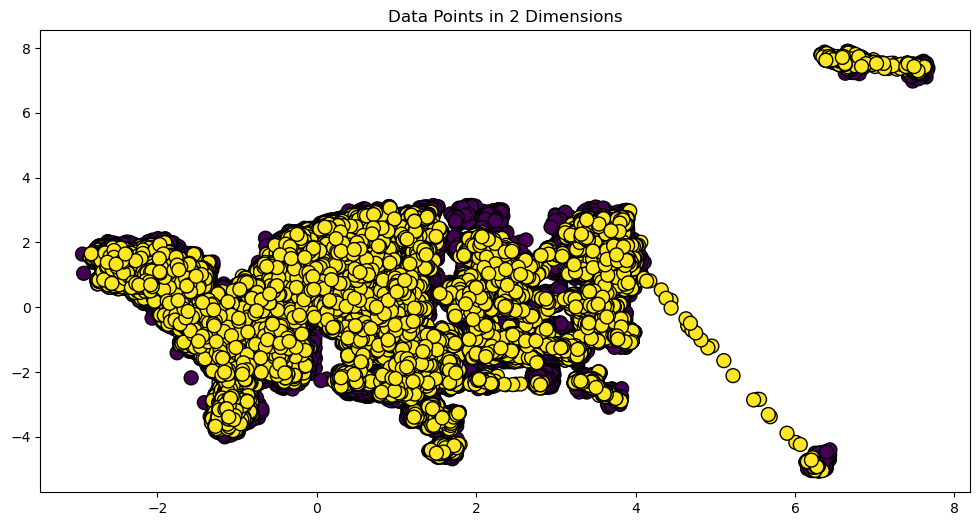

In [81]:
plt.figure(figsize=(12, 6))
plt.scatter(x_train_pca[:, 0], x_train_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=100)
plt.title("Data Points in 2 Dimensions")

In [82]:
from mpl_toolkits import mplot3d

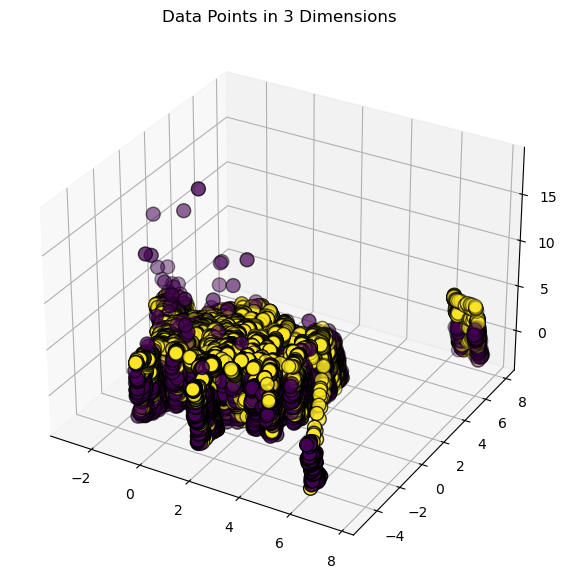

In [84]:
# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(x_train_pca[:, 0], x_train_pca[:, 1], x_train_pca[:, 2], c=y, cmap='viridis', edgecolor='k', s=100)
plt.title("Data Points in 3 Dimensions")
 
# show plot
plt.show()

We decide to plot in 2 and 3 dimensions, in both the cases it is possible to see a strong concentration of the points, this will probably lead to a difficult identification of clusters. 

Let's try to see:

### 1) K-means
It constructs groups of similar observations based on distance's metrics and is limited in identifying circular groups/clusters.
In the case where observations can be grouped into non-oval clusters, K-means fails to detect the actual cluster.
Problems with outliers as well.

**First**: define the number of clusters (K)

In [85]:
def optimal_k (data, max_k):
    means = []
    inertias = [] #average distance in each cluster between the point of the cluster and the centroid
    
    for k in range(1,max_k):
            kmeans = KMeans(n_clusters = k)
            kmeans.fit(data)
            
            means.append(k)
            inertias.append(kmeans.inertia_)
            

    plt.plot(means, inertias, 'o-')
    plt.grid(True)
    plt.xlabel('Number of cluster (k)')
    plt.ylabel('Inertia')
    plt.title("K-means Clustering")
    plt.show()

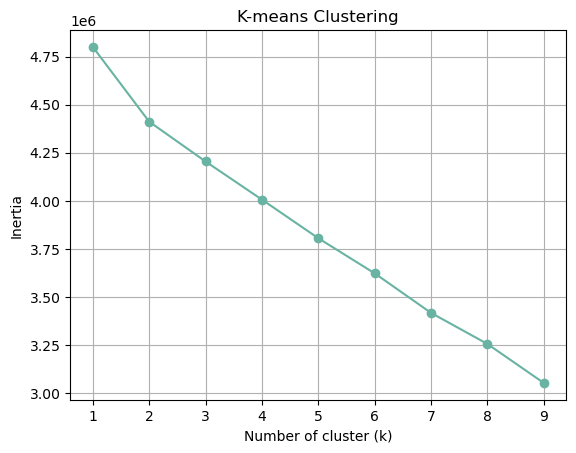

In [86]:
optimal_k(x_train_scaled, 10)

In this case, looking at the Elbow Graph it is not possible to see the presence of the "elbow", the curve where the optimal number of clusters is to be selected.
This may be another confirmation of the unsuitability of the k-means algorithm for this dataset or the absence of clusters.
Since k-means is very sensitive to preprocessing, we will also try to implement the DBScan algorithm.
However, we will try to run the k-means algorithm by choosing, through visual inspection of the points, a k-level of 2.

**Second**: choose the type of distance metric, since we transform all categorical variables into numbers, we choose Euclidean distance.

In [87]:
k_means = KMeans(n_clusters = 2, random_state=SEED) # random_state is to fix a random number generator
k_means_label = k_means.fit_predict(x_train_scaled) 

In [88]:
k_means_label

array([0, 1, 1, ..., 0, 1, 1], dtype=int32)

##### DBScan

DBScan is able to produce clusters with an arbitrary shape and without be affect by the noise data

First of all, we have to define the 2 Density thresholds:

- The radius of the hyper-spherical neighborhood

- The number of minimal point needed for a neighborhood to consider it as dense

Does not exist a single best choice for define this parameters, but we can follow a Rule of Thumb:

MinPts = 2*(number of attributes)-1

MinPts = 2*26 - 1 = 51

For the radius we have to inspecting the MinPts - distance plot.

In [89]:
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt

In [90]:
#It takes some time 
neighbors = NearestNeighbors(n_neighbors=51)
neighbors_fit = neighbors.fit(x_train_scaled)
distances, indices = neighbors_fit.kneighbors(x_train_scaled)

In [91]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]

Text(0.5, 1.0, 'MinPts - distance plot')

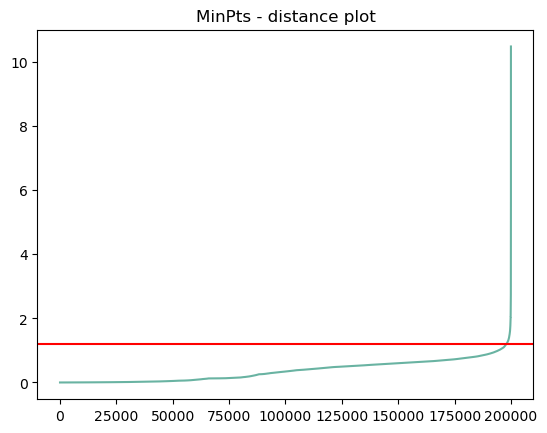

In [94]:
plt.plot(distances)
plt.axhline(y=1.2, xmin=0.0, xmax=1.0, color='r')
plt.title("MinPts - distance plot")

In [93]:
DBScan = DBSCAN(eps = 1.2, min_samples=51) # define the 2 parameters
DBScan_label = DBScan.fit_predict(x_train_scaled) 

**Plot K-means and DBScan**

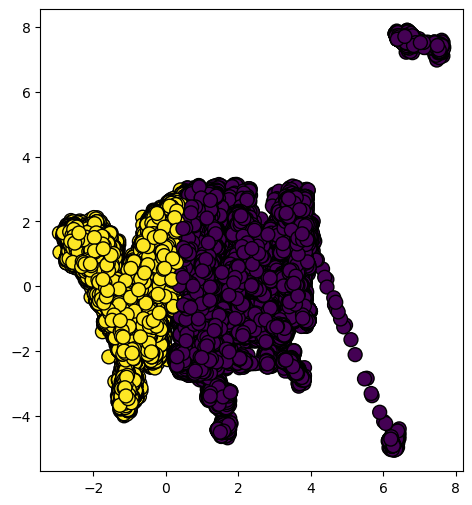

In [95]:
# K-means
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.scatter(x_train_pca[:,0], x_train_pca[:,1], c=k_means_label, cmap ='viridis', edgecolor = 'k', s =100)

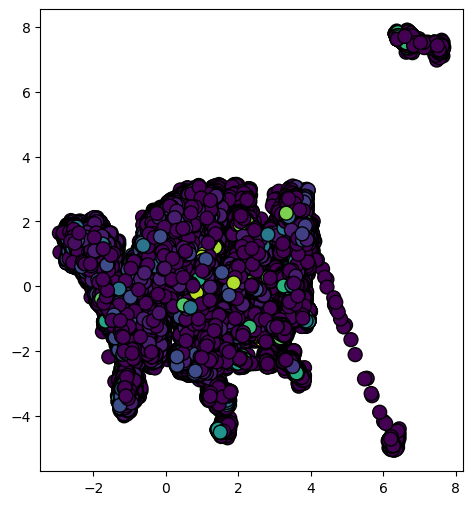

In [96]:
# DBScan
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.scatter(x_train_pca[:,0], x_train_pca[:,1], c=DBScan_label, cmap ='viridis', edgecolor = 'k', s =100)

It can be seen that in both clustering techniques it is not possible to observe a precise distinction of observations into clusters, so the 2 algorithms are not effective in providing new information on our dataset. 
(k-means is not able to divide the points correctly, DBScan provides too many clusters).

### Classification

Methods:
- Decision Tree
- Random Forest
- Baysian Classifier 
- K-NN
- Logistic regression

**Decision Tree**

In [97]:
SEED = 42

In [98]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [99]:
classifier = DecisionTreeClassifier()
classifier.fit(x_train_scaled, y)

DecisionTreeClassifier()

In [100]:
y_train_pred_DT = classifier.predict(x_train_scaled)

- Graphical rapresentation of the Decision Tree

In [101]:
features = X.columns.values
classes = ['0', '1']

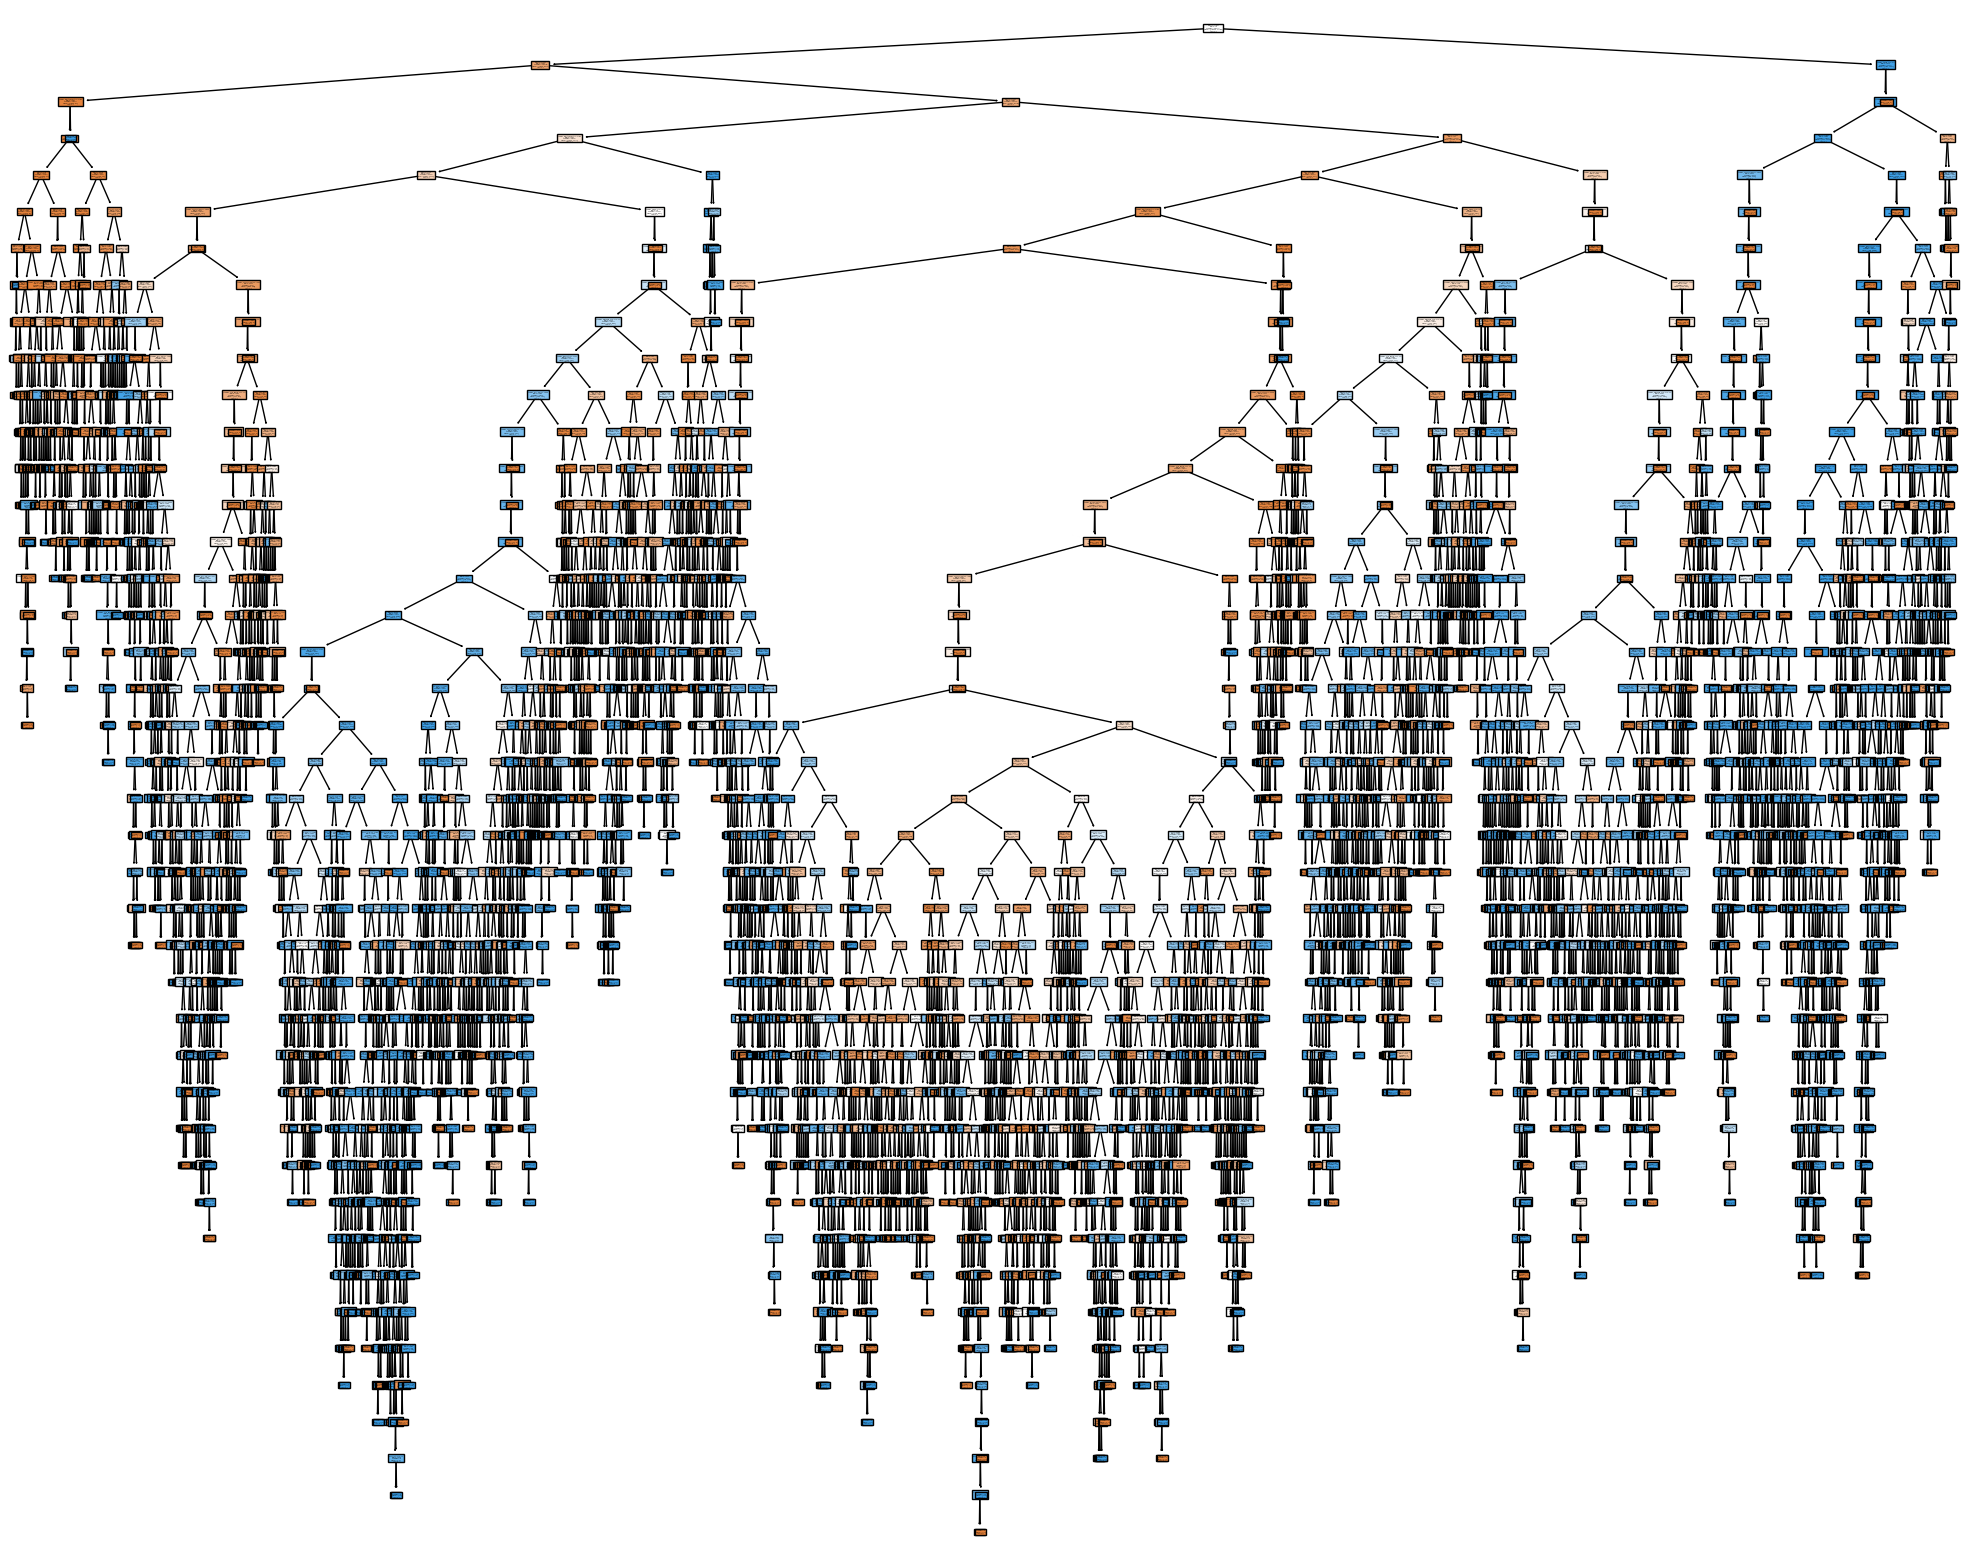

In [102]:
# It takes some time, but does not need to be executed.
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(classifier, 
                   feature_names=features,  
                   class_names=classes,
                   filled=True)

In [103]:
from sklearn.metrics import accuracy_score

Looking at the tree, it is possible to see a very large decision tree with many subdivisions. This is a problem because the decision tree model is too complex, so it takes a long time to build, and this can lead to overfitting.

In fact, when looking at the accuracy of the training set, one can see the maximum level:

In [104]:
print(accuracy_score(y, y_train_pred_DT))

1.0


The goodness of the model and the possible presence of overfitting will be evaluate in the next chapter.

**Random Forest**

In [105]:
from sklearn.ensemble import RandomForestClassifier

The Random Forest compared to the Decision Tree is more stable and can therefore lead to a reduction in overfitting.

In [106]:
rfc = RandomForestClassifier(random_state=SEED)

In [107]:
# it takes some time, Fit RandomForestClassifier
rfc.fit(x_train_scaled, y)

RandomForestClassifier(random_state=42)

In [108]:
# Predict the test set labels
y_train_pred_rfc = rfc.predict(x_train_scaled)

In [109]:
print(accuracy_score(y, y_train_pred_rfc))

1.0


**Naive Bayesian Classifier**

This model is based on the conditional probability between the target variable and the explanatory variables.

In [110]:
from sklearn.naive_bayes import GaussianNB

In [111]:
# Build a Gaussian Classifier
NBC = GaussianNB()

# Model training
NBC.fit(x_train_scaled, y)

GaussianNB()

In [112]:
# Predict Output
y_train_pred_NBC = NBC.predict(x_train_scaled)

In [113]:
print(accuracy_score(y, y_train_pred_NBC))

0.78962


##### K-NN

In [114]:
from sklearn.neighbors import KNeighborsClassifier

Critical point of this algorithm is the choice of the K parameter (number of nearest points that are taken in consideration for made the prediction of the class)

Plot K with respect the Accuracy for select the right choice of K

In [115]:
from sklearn.metrics import f1_score

In [116]:
# it takes a lot of time (it is the last one)
f1s = []

# Calculating f1 score for K values between 1 and 10 
for i in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train_scaled, y)
    pred_i = knn.predict(x_train_scaled)
    # using average='weighted' to calculate a weighted average for the 4 classes 
    f1s.append(f1_score(y, pred_i, average='weighted'))

Text(0, 0.5, 'F1 Score')

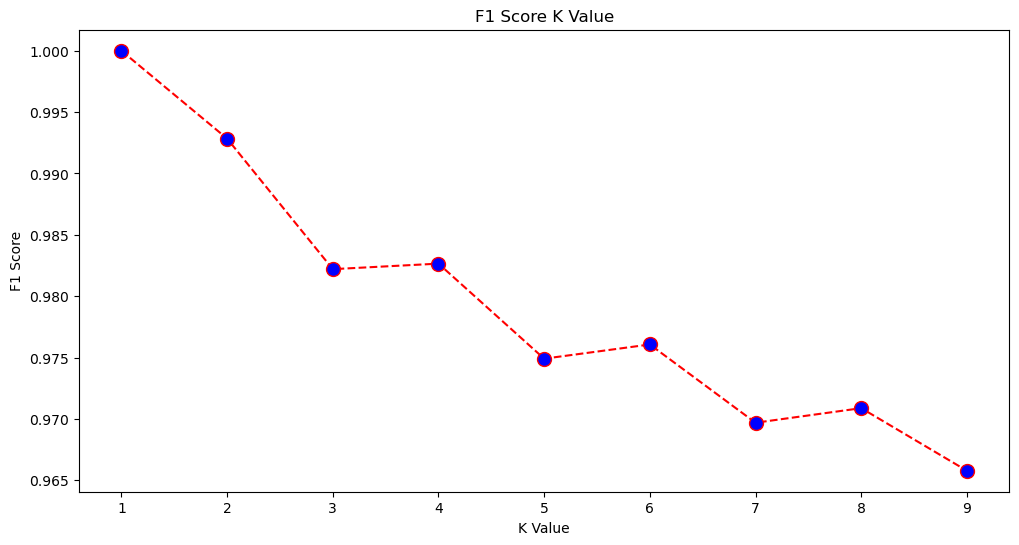

In [117]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 10), f1s, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('F1 Score K Value')
plt.xlabel('K Value')
plt.ylabel('F1 Score')

In this case, one can see a constant decrease in the F1 score as the number of neighbours increases.
The use of a too low k value, as the previous graph suggests, leads to a high complexity of the model and thus to the possibility of overfitting.
For this reason, it is decided to apply a k number of 3, losing in accuracy of the model.

In [118]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train_scaled, y)

KNeighborsClassifier(n_neighbors=3)

In [119]:
y_train_pred_knn = knn.predict(x_train_scaled)

In [120]:
accuracy_score(y, y_train_pred_knn)

0.982205

**Logistic Regression**

In [121]:
from sklearn.linear_model import LogisticRegression

In [122]:
lr = LogisticRegression() # we ca here modify the threshold parameter

lr.fit(x_train_scaled, y)

LogisticRegression()

In [124]:
# MAKE PREDICTION
y_train_pred_lr = lr.predict(x_train_scaled)

In [125]:
# EVALUATE THE MODEL
print(f'accuracy: {accuracy_score(y, y_train_pred_lr)}')

accuracy: 0.924065


### Evaluation Metrics

The chosen about the right model is given by a set of metrics for evaluate the performance of the models.

- **Predict the class in the validation set**

**First** we normalize the validation set, it is important to normalize the data also in prediction because we use normalize data in the fitting of the model (same we will do for the test set)

In [126]:
X_valid = validation_set.drop("is_fraud", axis='columns')
y_valid = validation_set['is_fraud']

In [127]:
X_valid_STD = scaler.transform(X_valid)

**Second** Make the classification for the validation set

Decision Tree

In [128]:
y_valid_pred_DT = classifier.predict(X_valid_STD)

Random Forest

In [129]:
y_valid_pred_rfc = rfc.predict(X_valid_STD)

Naive Bayes Classifier

In [130]:
y_valid_pred_NBC = NBC.predict(X_valid_STD)

K-NN

In [131]:
y_valid_pred_knn = knn.predict(X_valid_STD)

Logistic Regression

In [132]:
y_valid_pred_lr = lr.predict(X_valid_STD)

- **METRICS**

    - Jaccard Index: J = |y ⋂ yhat| / (|y| + |yhat| - |y ⋂ yhat|)

In [146]:
from tabulate import tabulate

In [143]:
from sklearn.metrics import jaccard_score

In [144]:
jaccard_data = [["Decision Tree", jaccard_score(y, y_train_pred_DT), jaccard_score(y_valid, y_valid_pred_DT)],
               ["Random Forest", jaccard_score(y, y_train_pred_rfc), jaccard_score(y_valid, y_valid_pred_rfc)],
               ["Naive Bayes Classifier", jaccard_score(y, y_train_pred_NBC), jaccard_score(y_valid, y_valid_pred_NBC)],
               ["K-NN", jaccard_score(y, y_train_pred_knn), jaccard_score(y_valid, y_valid_pred_knn)],
               ["Logistic Regression", jaccard_score(y, y_train_pred_lr), jaccard_score(y_valid, y_valid_pred_lr)]]

In [145]:
print(tabulate(jaccard_data, headers=["Model", "Training set evaluation", "Validation set evaluation"]))

Model                     Training set evaluation    Validation set evaluation
----------------------  -------------------------  ---------------------------
Decision Tree                            1                           0.175516
Random Forest                            1                           0.278689
Naive Bayes Classifier                   0.690424                    0.0111504
K-NN                                     0.965273                    0.099325
Logistic Regression                      0.860753                    0.0419009


Looking to the Jaccard Index is possible to see a strong presence of overfitting in almost all the models, with high level of accuracy in the training set and very low level of accuracy in the validation set.

We go on to use another accuracy index to see if there is consistency in the results and to get more information on the accuracy of the models.

    - F1 Score

Calculate the accuracy and the recall (metrics on the quality of classification evaluation).

Performing the confusion matrix we get: 

- Precision = True Positive / (True Positive + False Positive)
    - Accuracy of the model in predict the True Positive

- Re-Call = True Positive / (True Positive + False Negative)
    - Accuracy of the model in predict the Positive value.

Finaly we compiute the **F1-score**, which is a harmonic mean of precision and recall.

F1 = (2 * (Precision * Re-Call)) / (Precision + Re-Call) 
   - We have to compute the F1 Score for both the Target Values, and after we make the average.

   - F1 = 1 --> Prerfect precision and re-call

   - F1 = 0 --> worst case

Define the Confusion Matrix

In [147]:
from sklearn.metrics import classification_report, confusion_matrix

Decision Tree

In [148]:
print(confusion_matrix(y, y_train_pred_DT))
print(confusion_matrix(y_valid, y_valid_pred_DT))

[[100000      0]
 [     0 100000]]
[[19322   559]
 [    0   119]]


In [149]:
print("Training Set")
print(classification_report(y, y_train_pred_DT))
print("  ")
print("Validation Set")
print(classification_report(y_valid, y_valid_pred_DT))

Training Set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    100000
           1       1.00      1.00      1.00    100000

    accuracy                           1.00    200000
   macro avg       1.00      1.00      1.00    200000
weighted avg       1.00      1.00      1.00    200000

  
Validation Set
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     19881
           1       0.18      1.00      0.30       119

    accuracy                           0.97     20000
   macro avg       0.59      0.99      0.64     20000
weighted avg       1.00      0.97      0.98     20000



Random Forest

In [150]:
print(confusion_matrix(y, y_train_pred_rfc))
print(confusion_matrix(y_valid, y_valid_pred_rfc))

[[100000      0]
 [     0 100000]]
[[19573   308]
 [    0   119]]


In [151]:
print("Training Set")
print(classification_report(y, y_train_pred_rfc))
print("  ")
print("Validation Set")
print(classification_report(y_valid, y_valid_pred_rfc))

Training Set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    100000
           1       1.00      1.00      1.00    100000

    accuracy                           1.00    200000
   macro avg       1.00      1.00      1.00    200000
weighted avg       1.00      1.00      1.00    200000

  
Validation Set
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     19881
           1       0.28      1.00      0.44       119

    accuracy                           0.98     20000
   macro avg       0.64      0.99      0.71     20000
weighted avg       1.00      0.98      0.99     20000



Naive Bayes Classifier

In [152]:
print(confusion_matrix(y, y_train_pred_NBC))
print(confusion_matrix(y_valid, y_valid_pred_NBC))

[[64085 35915]
 [ 6161 93839]]
[[12646  7235]
 [   37    82]]


In [153]:
print("Training Set")
print(classification_report(y, y_train_pred_NBC))
print("  ")
print("Validation Set")
print(classification_report(y_valid, y_valid_pred_NBC))

Training Set
              precision    recall  f1-score   support

           0       0.91      0.64      0.75    100000
           1       0.72      0.94      0.82    100000

    accuracy                           0.79    200000
   macro avg       0.82      0.79      0.78    200000
weighted avg       0.82      0.79      0.78    200000

  
Validation Set
              precision    recall  f1-score   support

           0       1.00      0.64      0.78     19881
           1       0.01      0.69      0.02       119

    accuracy                           0.64     20000
   macro avg       0.50      0.66      0.40     20000
weighted avg       0.99      0.64      0.77     20000



K-NN

In [154]:
print(confusion_matrix(y, y_train_pred_knn))
print(confusion_matrix(y_valid, y_valid_pred_knn))

[[97514  2486]
 [ 1073 98927]]
[[18963   918]
 [   16   103]]


In [155]:
print("Training Set")
print(classification_report(y, y_train_pred_knn))
print("  ")
print("Validation Set")
print(classification_report(y_valid, y_valid_pred_knn))

Training Set
              precision    recall  f1-score   support

           0       0.99      0.98      0.98    100000
           1       0.98      0.99      0.98    100000

    accuracy                           0.98    200000
   macro avg       0.98      0.98      0.98    200000
weighted avg       0.98      0.98      0.98    200000

  
Validation Set
              precision    recall  f1-score   support

           0       1.00      0.95      0.98     19881
           1       0.10      0.87      0.18       119

    accuracy                           0.95     20000
   macro avg       0.55      0.91      0.58     20000
weighted avg       0.99      0.95      0.97     20000



Logistic Regression

In [156]:
print(confusion_matrix(y, y_train_pred_lr))
print(confusion_matrix(y_valid, y_valid_pred_lr))

[[90935  9065]
 [ 6122 93878]]
[[18043  1838]
 [   37    82]]


In [157]:
print("Training Set")
print(classification_report(y, y_train_pred_lr))
print("  ")
print("Validation Set")
print(classification_report(y_valid, y_valid_pred_lr))

Training Set
              precision    recall  f1-score   support

           0       0.94      0.91      0.92    100000
           1       0.91      0.94      0.93    100000

    accuracy                           0.92    200000
   macro avg       0.92      0.92      0.92    200000
weighted avg       0.92      0.92      0.92    200000

  
Validation Set
              precision    recall  f1-score   support

           0       1.00      0.91      0.95     19881
           1       0.04      0.69      0.08       119

    accuracy                           0.91     20000
   macro avg       0.52      0.80      0.52     20000
weighted avg       0.99      0.91      0.95     20000



As can be seen from the confusion matrices, the accuracy of all models is particularly low for fraudulent transactions, with the recall value being quite high. This means that the models poorly predict non-fraudulent transactions in the reality as fraudulent, so we have many false positives. Instead, they predict quite well the transactions that are really fraudulent (high value of the recall).

Average F1-score should be at least 80% for a enough accurate model.
Overall, the model that performs better in terms of recall and accuracy (F1_score), both in average and with respect the "is_fraud" = 1 (that is our goal), is **Random Forest**.

## Application of the best model on the test set

Import the Test Set

In [163]:
test = pd.read_csv('fraudTest.csv')

In [164]:
test

Unnamed: 0 trans_date_trans_time            cc_num  \
0                0   2020-06-21 12:14:25  2291163933867244   
1                1   2020-06-21 12:14:33  3573030041201292   
2                2   2020-06-21 12:14:53  3598215285024754   
3                3   2020-06-21 12:15:15  3591919803438423   
4                4   2020-06-21 12:15:17  3526826139003047   
...            ...                   ...               ...   
555714      555714   2020-12-31 23:59:07    30560609640617   
555715      555715   2020-12-31 23:59:09  3556613125071656   
555716      555716   2020-12-31 23:59:15  6011724471098086   
555717      555717   2020-12-31 23:59:24     4079773899158   
555718      555718   2020-12-31 23:59:34  4170689372027579   

                                    merchant        category     amt    first  \
0                      fraud_Kirlin and Sons   personal_care    2.86     Jeff   
1                       fraud_Sporer-Keebler   personal_care   29.84   Joanne   
2       fraud_Swaniawski, Nitzsche and Welch  health_fitness   41.28   Ashley   
3                          fraud_Haley Group        misc_pos   60.05    Brian   
4                      fraud_Johnston-Casper          travel    3.19   Nathan   
...                                      ...             ...     ...      ...   
555714                 fraud_Reilly and Sons  health_fitness   43.77  Michael   
555715                  fraud_Hoppe-Parisian       kids_pets  111.84     Jose   
555716                       fraud_Rau-Robel       kids_pets   86.88      Ann   
555717                 fraud_Breitenberg LLC          travel    7.99     Eric   
555718                     fraud_Dare-Marvin   entertainment   38.13   Samuel   

            last gender                       street  ...      lat      long  \
0        Elliott      M            351 Darlene Green  ...  33.9659  -80.9355   
1       Williams      F             3638 Marsh Union  ...  40.3207 -110.4360   
2          Lopez      F         9333 Valentine Point  ...  40.6729  -73.5365   
3       Williams      M  32941 Krystal Mill Apt. 552  ...  28.5697  -80.8191   
4         Massey      M     5783 Evan Roads Apt. 465  ...  44.2529  -85.0170   
...          ...    ...                          ...  ...      ...       ...   
555714     Olson      M          558 Michael Estates  ...  40.4931  -91.8912   
555715   Vasquez      M          572 Davis Mountains  ...  29.0393  -95.4401   
555716    Lawson      F   144 Evans Islands Apt. 683  ...  46.1966 -118.9017   
555717   Preston      M   7020 Doyle Stream Apt. 951  ...  44.6255 -116.4493   
555718      Frey      M     830 Myers Plaza Apt. 384  ...  35.6665  -97.4798   

        city_pop                     job         dob  \
0         333497     Mechanical engineer  1968-03-19   
1            302  Sales professional, IT  1990-01-17   
2          34496       Librarian, public  1970-10-21   
3          54767            Set designer  1987-07-25   
4           1126      Furniture designer  1955-07-06   
...          ...                     ...         ...   
555714       519            Town planner  1966-02-13   
555715     28739          Futures trader  1999-12-27   
555716      3684                Musician  1981-11-29   
555717       129            Cartographer  1965-12-15   
555718    116001             Media buyer  1993-05-10   

                               trans_num   unix_time  merch_lat  merch_long  \
0       2da90c7d74bd46a0caf3777415b3ebd3  1371816865  33.986391  -81.200714   
1       324cc204407e99f51b0d6ca0055005e7  1371816873  39.450498 -109.960431   
2       c81755dbbbea9d5c77f094348a7579be  1371816893  40.495810  -74.196111   
3       2159175b9efe66dc301f149d3d5abf8c  1371816915  28.812398  -80.883061   
4       57ff021bd3f328f8738bb535c302a31b  1371816917  44.959148  -85.884734   
...                                  ...         ...        ...         ...   
555714  9b1f753c79894c9f4b71f04581835ada  1388534347  39.946837  -91.333331   
555715  2090647dac2c89a1

Provide the same pre proceccessing trasformation applied to the training set:

In [165]:
test.isna().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [166]:
test['dob']= date.today().year - pd.to_datetime(test['dob']).dt.year
test1 = test.drop(columns=['Unnamed: 0', 'cc_num', 'first', 'last', 'unix_time', 'trans_num'])

In [167]:
test.duplicated().sum()

0

In [168]:
# first we adding the variable hour, day, month and year to the dataset for substitute the varaible 'trans_date_trans_time'
test1['hour']=pd.to_datetime(test1['trans_date_trans_time']).dt.hour
test1['day']=pd.to_datetime(test1['trans_date_trans_time']).dt.dayofweek
test1['month']=pd.to_datetime(test1['trans_date_trans_time']).dt.month
test1['year']=pd.to_datetime(test1['trans_date_trans_time']).dt.year

# second we select a subset of the attributes
test_set = test1[['category','amt','zip','lat','long','city_pop','merch_lat','merch_long','dob','hour','day','month','is_fraud']]

In [169]:
test_set=pd.get_dummies(test_set, drop_first=True)

test_set

amt    zip      lat      long  city_pop  merch_lat  merch_long  \
0         2.86  29209  33.9659  -80.9355    333497  33.986391  -81.200714   
1        29.84  84002  40.3207 -110.4360       302  39.450498 -109.960431   
2        41.28  11710  40.6729  -73.5365     34496  40.495810  -74.196111   
3        60.05  32780  28.5697  -80.8191     54767  28.812398  -80.883061   
4         3.19  49632  44.2529  -85.0170      1126  44.959148  -85.884734   
...        ...    ...      ...       ...       ...        ...         ...   
555714   43.77  63453  40.4931  -91.8912       519  39.946837  -91.333331   
555715  111.84  77566  29.0393  -95.4401     28739  29.661049  -96.186633   
555716   86.88  99323  46.1966 -118.9017      3684  46.658340 -119.715054   
555717    7.99  83643  44.6255 -116.4493       129  44.470525 -117.080888   
555718   38.13  73034  35.6665  -97.4798    116001  36.210097  -97.036372   

        dob  hour  day  ...  category_grocery_pos  category_health_fitness  \
0        55    12    6  ...                     0                        0   
1        33    12    6  ...                     0                        0   
2        53    12    6  ...                     0                        1   
3        36    12    6  ...                     0                        0   
4        68    12    6  ...                     0                        0   
...     ...   ...  ...  ...                   ...                      ...   
555714   57    23    3  ...                     0                        1   
555715   24    23    3  ...                     0                        0   
555716   42    23    3  ...                     0                        0   
555717   58    23    3  ...                     0                        0   
555718   30    23    3  ...                     0                        0   

        category_home  category_kids_pets  category_misc_net  \
0                   0                   0                  0   
1                   0                   0                  0   
2                   0                   0                  0   
3                   0                   0                  0   
4                   0                   0                  0   
...               ...                 ...                ...   
555714              0                   0                  0   
555715              0                   1                  0   
555716              0                   1                  0   
555717              0                   0                  0   
555718              0                   0                  0   

        category_misc_pos  category_personal_care  category_shopping_net  \
0                       0                       1                      0   
1                       0                       1                      0   
2                       0                       0                      0   
3                       1                       0                      0   
4                       0                       0                      0   
...                   ...                     ...                    ...   
555714                  0                       0                      0   
555715                  0                       0                      0   
555716                  0                       0                      0   
555717                  0                       0                      0   
555718                  0                       0                      0   

        category_shopping_pos  category_travel  
0                           0                0  
1                           0                0  
2                           0                0  
3                           0                0  
4                           0                1  
...                       ...              ...  
555714                      0                0  
555715                      0                0  
555716                    

Also for the test set we select a subsample of 20000 observations.

In [170]:
test_set_sample = test_set.sample(20000)

In [171]:
X_test = test_set_sample.drop("is_fraud", axis='columns')
y_test = test_set_sample['is_fraud']

In [172]:
X_test_STD = scaler.transform(X_test)

Make The Prediction with the model choice: **Random Forest**

In [173]:
y_test_pred = rfc.predict(X_test_STD)

See the accuracy of the model in provide classification for the test set

In [174]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     19923
           1       0.19      0.84      0.32        77

    accuracy                           0.99     20000
   macro avg       0.60      0.92      0.65     20000
weighted avg       1.00      0.99      0.99     20000



The classification results well performed if we looking to the re-call, so in classified correctly the fraudulent transaction. But, the model is also affected by a hugh miss-classification in define many ordinary transaction as fraudulent (False positive).